# 8.6 其他降维技术

## 8.6.1 随机投影
顾名思义，使用随机线性投影将数据投影到较低维度的空间。这听起来可能很疯狂，但事实证明，这样的随机投影实际上很有可能很好地保持距离，就如WilliamB.Johnson和Joram Lindenstrauss在著名引理中的数学证明。**降维的质量取决于实例数目和目标维度，令人惊讶的不取决于初始维度**。请查看sklearn.random_projection软件包的文档以获取更多详细信息。

## 8.6.2 多维缩放(MDS)
**当尝试保留实例之间的距离是可以采用多维缩放**

## 8.6.3 Isomap
通过将每个实例与其最近的邻居连接来创建一个图，然后在尝试保留实例之间的测地距离的同时降低维度。

> 一个图中两个节点之间的测地距离是这些节点之间最短路径的上的节点数。

## 8.6.4 t分布随机近邻嵌入（t-SNE）

降低了维度，同时使相似实例保持接近，异类实例分开。它主要用于可视化，特别是在高维空间中可视化实例的聚类（例如，以2D可视化MNIST图像）。

## 8.6.5 线性判别分析（LDA）
LDA是一种分类算法，但是在训练过程中，它会学习各类之间最有判别力的轴，然后可以使用这些轴来定义要在其上投影数据的超平面。这种方法的好处是投影将使类保持尽可能远的距离，因此LDA是在运行其他分类算法（例如SVM分类器）之前降低维度的好技术。

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, random_state=42)

In [3]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE



pca = PCA(n_components=2, random_state=42)
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.043333333, fit_inverse_transform=True)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, random_state=42)



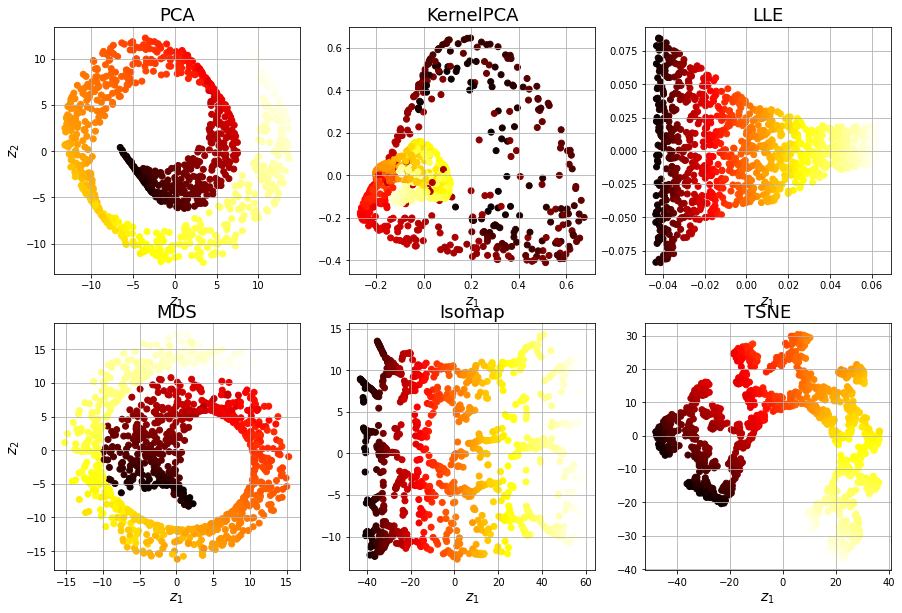

In [4]:
plt.figure(figsize=(15, 10))
for subplot, title, model in ((231, "PCA", pca), (232, "KernelPCA", kpca), (233, "LLE", lle),(234, "MDS", mds), (235, "Isomap", isomap), (236, "TSNE", tsne)):
    X_reduced = model.fit_transform(X)
    plt.subplot(subplot)
    plt.title(title, fontsize=18)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=14)
    if subplot == 231 or subplot == 234:
        plt.ylabel("$z_2$", fontsize=14)
    plt.grid(True)

plt.show()

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_new = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y_new = np.array([1, 1, 1, 2, 2, 2])
lda_clf = LinearDiscriminantAnalysis()

lda_clf.fit(X_new, y_new)
print(lda_clf.predict([[-0.8, -1]]))


[1]
